<a href="https://colab.research.google.com/github/ssttv/ml-resources/blob/master/fastai_dl5_movielens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!apt-get install -y -qq software-properties-common module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
!pip3 install fastai==0.7.0

In [0]:
!pip3 install torchtext==0.2.3

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.learner import *
from fastai.column_data import *

In [0]:
!wget http://files.grouplens.org/datasets/movielens/ml-latest-small.zip
!unzip ml-latest-small.zip
!mkdir data
!mv ml-latest-small data

--2019-01-05 10:01:17--  http://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.34.235
Connecting to files.grouplens.org (files.grouplens.org)|128.101.34.235|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978202 (955K) [application/zip]
Saving to: ‘ml-latest-small.zip’

ml-latest-small.zip 100%[===================>] 955.28K  --.-KB/s    in 0.1s    

2019-01-05 10:01:17 (7.33 MB/s) - ‘ml-latest-small.zip’ saved [978202/978202]

Archive:  ml-latest-small.zip
   creating: ml-latest-small/
  inflating: ml-latest-small/links.csv  
  inflating: ml-latest-small/tags.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/README.txt  
  inflating: ml-latest-small/movies.csv  


In [0]:
path='data/ml-latest-small/'

In [0]:
ratings = pd.read_csv(path+'ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
movies = pd.read_csv(path+'movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
g=ratings.groupby('userId')['rating'].count()
topUsers=g.sort_values(ascending=False)[:15]

g=ratings.groupby('movieId')['rating'].count()
topMovies=g.sort_values(ascending=False)[:15]

top_r = ratings.join(topUsers, rsuffix='_r', how='inner', on='userId')
top_r = top_r.join(topMovies, rsuffix='_r', how='inner', on='movieId')

pd.crosstab(top_r.userId, top_r.movieId, top_r.rating, aggfunc=np.sum)

movieId,1,50,110,260,296,318,356,480,527,589,593,1196,2571,2858,2959
userId,,,,,,,,,,,,,,,
68,2.5,3.0,2.5,5.0,2.0,3.0,3.5,3.5,4.0,3.5,3.5,5.0,4.5,5.0,2.5
182,4.0,4.5,3.5,3.5,5.0,4.5,5.0,3.5,4.0,2.0,4.5,3.0,5.0,5.0,5.0
249,4.0,4.0,5.0,5.0,4.0,4.5,4.5,4.0,4.5,4.0,4.0,5.0,5.0,4.5,5.0
274,4.0,4.0,4.5,3.0,5.0,4.5,4.5,3.5,4.0,4.5,4.0,4.5,4.0,5.0,5.0
288,4.5,NaN,5.0,5.0,5.0,5.0,5.0,2.0,5.0,4.0,5.0,4.5,3.0,NaN,3.5
307,4.0,4.5,3.5,3.5,4.5,4.5,4.0,3.5,4.5,2.5,4.5,3.0,3.5,4.0,4.0
380,5.0,4.0,4.0,5.0,5.0,3.0,5.0,5.0,NaN,5.0,5.0,5.0,4.5,NaN,4.0
387,NaN,4.5,3.5,4.5,5.0,3.5,4.0,3.0,NaN,3.5,4.0,4.5,4.0,4.5,4.5
414,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0


In [0]:
val_idxs = get_cv_idxs(len(ratings))
wd=2e-4
n_factors = 50

In [0]:
cf = CollabFilterDataset.from_csv(path, 'ratings.csv', 'userId', 'movieId', 'rating')
learn = cf.get_learner(n_factors, val_idxs, 64, opt_fn=optim.Adam)

In [0]:
learn.fit(1e-2, 2, wds=wd, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   
    0      0.743587   0.774747  
    1      0.711504   0.75581   
    2      0.590478   0.738703  



[array([0.7387])]

In [0]:
math.sqrt(0.776)

0.8809086218218096

In [0]:
preds = learn.predict()

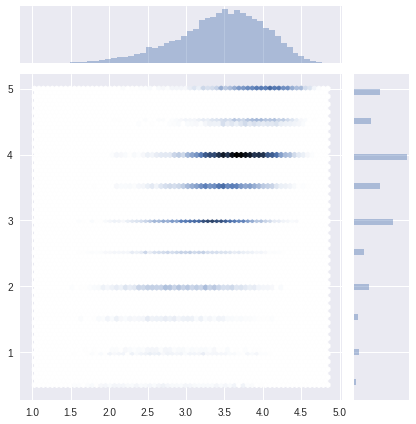

In [0]:
y=learn.data.val_y
sns.jointplot(preds, y, kind='hex', stat_func=None);

In [0]:
movie_names = movies.set_index('movieId')['title'].to_dict()
g=ratings.groupby('movieId')['rating'].count()
topMovies=g.sort_values(ascending=False).index.values[:3000]
topMovieIdx = np.array([cf.item2idx[o] for o in topMovies])

In [0]:
m=learn.model; m.cuda()

EmbeddingDotBias(
  (u): Embedding(610, 50)
  (i): Embedding(9724, 50)
  (ub): Embedding(610, 1)
  (ib): Embedding(9724, 1)
)

In [0]:
movie_bias = to_np(m.ib(V(topMovieIdx)))

In [0]:
movie_ratings = [(b[0], movie_names[i]) for i,b in zip(topMovies,movie_bias)]

In [0]:
sorted(movie_ratings, key=lambda o: o[0])[:15]

[(-0.71808666, 'Spice World (1997)'),
 (-0.71340644, 'Catwoman (2004)'),
 (-0.68893695, 'Problem Child (1990)'),
 (-0.6886232, 'Anaconda (1997)'),
 (-0.673943, 'Stuart Saves His Family (1995)'),
 (-0.6670832, 'Speed 2: Cruise Control (1997)'),
 (-0.6588677, 'Battlefield Earth (2000)'),
 (-0.621744, 'Flintstones in Viva Rock Vegas, The (2000)'),
 (-0.6118025, 'Joe Dirt (2001)'),
 (-0.6117188, 'Stop! Or My Mom Will Shoot (1992)'),
 (-0.6115112, 'Godzilla (1998)'),
 (-0.6109995, 'Grease 2 (1982)'),
 (-0.6051065, 'Karate Kid, Part III, The (1989)'),
 (-0.6032626, 'Super Mario Bros. (1993)'),
 (-0.599947, 'Jason X (2002)')]

In [0]:
sorted(movie_ratings, key=itemgetter(0))[:15]

[(-0.71808666, 'Spice World (1997)'),
 (-0.71340644, 'Catwoman (2004)'),
 (-0.68893695, 'Problem Child (1990)'),
 (-0.6886232, 'Anaconda (1997)'),
 (-0.673943, 'Stuart Saves His Family (1995)'),
 (-0.6670832, 'Speed 2: Cruise Control (1997)'),
 (-0.6588677, 'Battlefield Earth (2000)'),
 (-0.621744, 'Flintstones in Viva Rock Vegas, The (2000)'),
 (-0.6118025, 'Joe Dirt (2001)'),
 (-0.6117188, 'Stop! Or My Mom Will Shoot (1992)'),
 (-0.6115112, 'Godzilla (1998)'),
 (-0.6109995, 'Grease 2 (1982)'),
 (-0.6051065, 'Karate Kid, Part III, The (1989)'),
 (-0.6032626, 'Super Mario Bros. (1993)'),
 (-0.599947, 'Jason X (2002)')]

In [0]:
sorted(movie_ratings, key=lambda o: o[0], reverse=True)[:15]

[(1.2327476, 'Shawshank Redemption, The (1994)'),
 (0.9745466, 'Goodfellas (1990)'),
 (0.9408841, 'Pulp Fiction (1994)'),
 (0.9144735, 'Casablanca (1942)'),
 (0.9073034, 'Forrest Gump (1994)'),
 (0.9046505, 'Dark Knight, The (2008)'),
 (0.89746624, "Schindler's List (1993)"),
 (0.89367086, "Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)"),
 (0.8928887, 'Star Wars: Episode IV - A New Hope (1977)'),
 (0.8736371,
  'Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)'),
 (0.86174405, 'Star Wars: Episode V - The Empire Strikes Back (1980)'),
 (0.83802426, 'Godfather, The (1972)'),
 (0.8362374, 'American History X (1998)'),
 (0.831434, 'Eternal Sunshine of the Spotless Mind (2004)'),
 (0.8257496, "One Flew Over the Cuckoo's Nest (1975)")]

In [0]:
movie_emb = to_np(m.i(V(topMovieIdx)))
movie_emb.shape

(3000, 50)

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
movie_pca = pca.fit(movie_emb.T).components_

In [0]:
movie_pca.shape

(3, 3000)

In [0]:
fac0 = movie_pca[0]
movie_comp = [(f, movie_names[i]) for f,i in zip(fac0, topMovies)]

In [0]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(0.06662063, 'Congo (1995)'),
 (0.061289035, 'Independence Day (a.k.a. ID4) (1996)'),
 (0.061002906, 'Twister (1996)'),
 (0.05996734, 'First Knight (1995)'),
 (0.059282508, 'Broken Arrow (1996)'),
 (0.05755112, 'Home Alone 2: Lost in New York (1992)'),
 (0.054288838, 'Batman Forever (1995)'),
 (0.05345344, 'Casper (1995)'),
 (0.052828778, 'Lara Croft: Tomb Raider (2001)'),
 (0.050373737, 'The Scorpion King (2002)')]

In [0]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(-0.10193114, 'Pulp Fiction (1994)'),
 (-0.08334034, 'Fight Club (1999)'),
 (-0.07929038, 'Godfather, The (1972)'),
 (-0.07747319, 'Big Lebowski, The (1998)'),
 (-0.07461213, "Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)"),
 (-0.073920935, 'American Beauty (1999)'),
 (-0.06967537, 'Monty Python and the Holy Grail (1975)'),
 (-0.06631224, 'Memento (2000)'),
 (-0.06507845, 'Godfather: Part II, The (1974)'),
 (-0.0645468, 'Donnie Darko (2001)')]

In [0]:
fac1 = movie_pca[1]
movie_comp = [(f, movie_names[i]) for f,i in zip(fac1, topMovies)]

In [0]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(0.060699098, 'Blair Witch Project, The (1999)'),
 (0.057921503, 'Eyes Wide Shut (1999)'),
 (0.056583237, 'Mulholland Drive (2001)'),
 (0.05378052, 'Election (1999)'),
 (0.04998991, 'Judge Dredd (1995)'),
 (0.04965712, 'Blue Velvet (1986)'),
 (0.046825532, 'The Artist (2011)'),
 (0.04569879, 'Clueless (1995)'),
 (0.04467792, 'Showgirls (1995)'),
 (0.044503212, 'Others, The (2001)')]

In [0]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(-0.1093069, 'Matrix, The (1999)'),
 (-0.09376553, 'Braveheart (1995)'),
 (-0.08384445, 'Lion King, The (1994)'),
 (-0.08360965, 'Back to the Future (1985)'),
 (-0.083012424,
  'Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)'),
 (-0.08043311, 'Speed (1994)'),
 (-0.08027351, 'Independence Day (a.k.a. ID4) (1996)'),
 (-0.08016788, 'True Lies (1994)'),
 (-0.07978522, 'Forrest Gump (1994)'),
 (-0.07872934, 'Star Wars: Episode V - The Empire Strikes Back (1980)')]

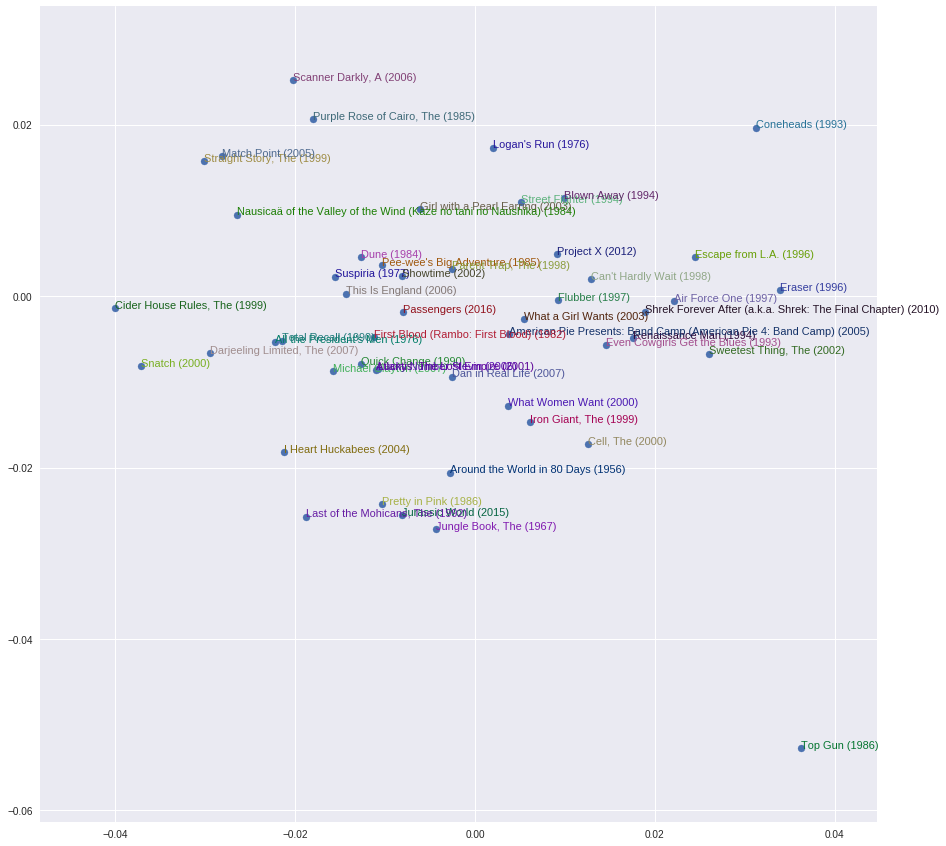

In [0]:
idxs = np.random.choice(len(topMovies), 50, replace=False)
X = fac0[idxs]
Y = fac1[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(topMovies[idxs], X, Y):
    plt.text(x,y,movie_names[i], color=np.random.rand(3)*0.7, fontsize=11)
plt.show()

In [0]:
a = T([[1.,2],[3,4]])
b = T([[2.,2],[10,10]])
a,b

(
  1  2
  3  4
 [torch.cuda.FloatTensor of size 2x2 (GPU 0)], 
   2   2
  10  10
 [torch.cuda.FloatTensor of size 2x2 (GPU 0)])

In [0]:
a*b


  2   4
 30  40
[torch.cuda.FloatTensor of size 2x2 (GPU 0)]

In [0]:
(a*b).sum(1)


  6
 70
[torch.cuda.FloatTensor of size 2 (GPU 0)]

In [0]:

class DotProduct(nn.Module):
    def forward(self, u, m): return (u*m).sum(1)

In [0]:
model=DotProduct()

In [0]:
model(a,b)


  6
 70
[torch.cuda.FloatTensor of size 2 (GPU 0)]

In [0]:
u_uniq = ratings.userId.unique()
user2idx = {o:i for i,o in enumerate(u_uniq)}
ratings.userId = ratings.userId.apply(lambda x: user2idx[x])

m_uniq = ratings.movieId.unique()
movie2idx = {o:i for i,o in enumerate(m_uniq)}
ratings.movieId = ratings.movieId.apply(lambda x: movie2idx[x])

n_users=int(ratings.userId.nunique())
n_movies=int(ratings.movieId.nunique())

In [0]:
class EmbeddingDot(nn.Module):
    def __init__(self, n_users, n_movies):
        super().__init__()
        self.u = nn.Embedding(n_users, n_factors)
        self.m = nn.Embedding(n_movies, n_factors)
        self.u.weight.data.uniform_(0,0.05)
        self.m.weight.data.uniform_(0,0.05)
        
    def forward(self, cats, conts):
        users,movies = cats[:,0],cats[:,1]
        u,m = self.u(users),self.m(movies)
        return (u*m).sum(1).view(-1, 1)

In [0]:

x = ratings.drop(['rating', 'timestamp'],axis=1)
y = ratings['rating'].astype(np.float32)

In [0]:
data = ColumnarModelData.from_data_frame(path, val_idxs, x, y, ['userId', 'movieId'], 64)

In [0]:
wd=1e-5
model = EmbeddingDot(n_users, n_movies).cuda()
opt = optim.SGD(model.parameters(), 1e-1, weight_decay=wd, momentum=0.9)

In [0]:
fit(model, data, 3, opt, F.mse_loss)

epoch      trn_loss   val_loss   
    0      1.597462   1.605762  
    1      1.025854   1.289598  
    2      0.882318   1.224778  



[array([1.22478])]

In [0]:
set_lrs(opt, 0.01)

In [0]:
fit(model, data, 3, opt, F.mse_loss)

epoch      trn_loss   val_loss   
    0      0.679463   1.152166  
    1      0.665684   1.141327  
    2      0.642427   1.136183  



[array([1.13618])]

In [0]:
min_rating,max_rating = ratings.rating.min(),ratings.rating.max()
min_rating,max_rating

(0.5, 5.0)

In [0]:
def get_emb(ni,nf):
    e = nn.Embedding(ni, nf)
    e.weight.data.uniform_(-0.01,0.01)
    return e

class EmbeddingDotBias(nn.Module):
    def __init__(self, n_users, n_movies):
        super().__init__()
        (self.u, self.m, self.ub, self.mb) = [get_emb(*o) for o in [
            (n_users, n_factors), (n_movies, n_factors), (n_users,1), (n_movies,1)
        ]]
        
    def forward(self, cats, conts):
        users,movies = cats[:,0],cats[:,1]
        um = (self.u(users)* self.m(movies)).sum(1)
        res = um + self.ub(users).squeeze() + self.mb(movies).squeeze()
        res = F.sigmoid(res) * (max_rating-min_rating) + min_rating
        return res.view(-1, 1)

In [0]:
wd=2e-4
model = EmbeddingDotBias(cf.n_users, cf.n_items).cuda()
opt = optim.SGD(model.parameters(), 1e-1, weight_decay=wd, momentum=0.9)

In [0]:
fit(model, data, 3, opt, F.mse_loss)

epoch      trn_loss   val_loss   
    0      0.816016   0.814077  
    1      0.760468   0.796955  
    2      0.764757   0.78756   



[array([0.78756])]

In [0]:
set_lrs(opt, 1e-2)

In [0]:
fit(model, data, 3, opt, F.mse_loss)

epoch      trn_loss   val_loss   
    0      0.69678    0.781268  
    1      0.719466   0.780251  
    2      0.707979   0.779494  



[array([0.77949])]

In [0]:

class EmbeddingNet(nn.Module):
    def __init__(self, n_users, n_movies, nh=10, p1=0.05, p2=0.5):
        super().__init__()
        (self.u, self.m) = [get_emb(*o) for o in [
            (n_users, n_factors), (n_movies, n_factors)]]
        self.lin1 = nn.Linear(n_factors*2, nh)
        self.lin2 = nn.Linear(nh, 1)
        self.drop1 = nn.Dropout(p1)
        self.drop2 = nn.Dropout(p2)
        
    def forward(self, cats, conts):
        users,movies = cats[:,0],cats[:,1]
        x = self.drop1(torch.cat([self.u(users),self.m(movies)], dim=1))
        x = self.drop2(F.relu(self.lin1(x)))
        return F.sigmoid(self.lin2(x)) * (max_rating-min_rating+1) + min_rating-0.5

In [0]:
wd=1e-5
model = EmbeddingNet(n_users, n_movies).cuda()
opt = optim.Adam(model.parameters(), 1e-3, weight_decay=wd)


In [0]:
fit(model, data, 3, opt, F.mse_loss)

epoch      trn_loss   val_loss   
    0      0.85435    0.789304  
    1      0.744012   0.775673  
    2      0.75922    0.766714  



[array([0.76671])]

In [0]:
set_lrs(opt,1e-3)

In [0]:
fit(model, data, 3, opt, F.mse_loss)

epoch      trn_loss   val_loss   
    0      0.724295   0.767693  
    1      0.740638   0.771425  
    2      0.727892   0.774707  



[array([0.77471])]